In [ ]:
###gpu code
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Found GPU at: /device:GPU:0
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.824788921999982
GPU (s):
0.18716424600000892
GPU speedup over CPU: 20x


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


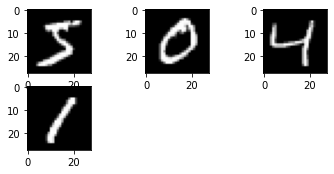

In [ ]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import pickle
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(4):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras

trainX = trainX.reshape([-1, 28, 28, 1])
testX = testX.reshape([-1, 28, 28, 1])
trainX = trainX/255.0
testX = testX/255.0
trainy = keras.utils.to_categorical(trainy)
testy = keras.utils.to_categorical(testy)
num_c = testy.shape[1]
# define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1], activation ='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (5, 5), padding="same", activation ='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1048, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_c, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# training  the model
model.fit(trainX,trainy, validation_data=(testX,testy), epochs=30, batch_size =150)
test_loss,test_acc = model.evaluate(testX, testy)
print('Test accuracy:', test_acc)



In [ ]:
#test the model
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(-1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np
import os
import sys
def run_example():
	# load the image
	img = load_image('/content/images.png')
	# load model
	# predict the class
	digit = model.predict_classes(img)
	print(digit[0])

In [ ]:
import warnings
warnings.filterwarnings("ignore")
run_example()


In [ ]:
pip install tensorflowjs

In [ ]:
import tensorflowjs as jstf

In [ ]:
#save the model
model.save("model.h5")

In [ ]:
#convert saved model to JsoN 
!tensorflowjs_converter --input_format keras '/content/model.h5' '/content/model'